In [ ]:
import zipfile
import os
zip_file_path = '//content/mel_spectrograms.zip'
extract_path = '//content/mel_spectrograms'


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


extracted_files = os.listdir(extract_path)
extracted_files

['hungry', 'burping', 'belly_pain', 'tired', 'discomfort']

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
base_dir = "/content/mel_spectrograms"
train_dir = "/content/train"
test_dir = "/content/test"


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


split_ratio = 0.8


for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)


    if os.path.isdir(class_path):
        print(f"Processing class: {class_name}")

    
        files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        if not files:  
            print(f"Skipping empty folder for class: {class_name}")
            continue

        train_files, test_files = train_test_split(files, train_size=split_ratio, random_state=42)

        
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        
        for file in train_files:
            src_path = os.path.join(class_path, file)
            dest_path = os.path.join(train_class_dir, file)
            shutil.copy(src_path, dest_path)

       
        for file in test_files:
            src_path = os.path.join(class_path, file)
            dest_path = os.path.join(test_class_dir, file)
            shutil.copy(src_path, dest_path)

print("Data successfully split into train and test folders!")


Processing class: hungry
Processing class: burping
Processing class: belly_pain
Processing class: tired
Processing class: discomfort
Data successfully split into train and test folders!


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [7]:
img_height = 200
img_width = 500

batch_size = 32

train_dir = "/content/train"
test_dir = "/content/test"


train_datagen = ImageDataGenerator(
    rescale=1.0/255,

)


test_datagen = ImageDataGenerator(
    rescale=1.0/255,

)

# Train data loader
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)



# Test data loader
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 550 images belonging to 5 classes.
Found 140 images belonging to 5 classes.


In [8]:
import tensorflow as tf

# Load the model from the .h5 file
model = tf.keras.models.load_model('/content/2d_cnn.h5')

# Predict on X_test
predictions = model.predict(train_generator)


print(predictions)


18/18 [==============================] - 7s 372ms/step
[[2.85521742e-06 4.53916000e-05 4.99342150e-06 9.99921381e-01
  2.52378613e-05]
 [7.42031492e-10 2.81791014e-11 3.81864846e-16 9.99999940e-01
  1.73042743e-11]
 [1.80329573e-09 8.87821094e-10 1.01428895e-13 9.99999940e-01
  7.00417285e-12]
 ...
 [3.54555937e-06 9.99856591e-01 2.67756946e-06 1.31392691e-04
  5.82407711e-06]
 [8.56453884e-12 9.84095805e-10 2.74747891e-10 1.00000000e+00
  2.40378217e-10]
 [3.40881741e-08 3.69948651e-07 7.55244867e-10 9.99999642e-01
  2.95069889e-08]]


In [9]:
print(len(predictions))

550


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [11]:
# Load train and test datasets
train_data = pd.read_csv('/content/train_mfcc_features (1).csv')
test_data = pd.read_csv('/content/test_mfcc_features (1).csv')


In [12]:

X_train = train_data.iloc[:, :-1].values
y_train = train_data['label'].values


X_test = test_data.iloc[:, :-1].values
y_test = test_data['label'].values


In [13]:

shift_mean_train = np.mean(np.diff(X_train, axis=1), axis=1).reshape(-1, 1)
shift_mean_test = np.mean(np.diff(X_test, axis=1), axis=1).reshape(-1, 1)


rms_mean_train = np.sqrt(np.mean(X_train ** 2, axis=1)).reshape(-1, 1)
rms_mean_test = np.sqrt(np.mean(X_test ** 2, axis=1)).reshape(-1, 1)


X_train = np.hstack((X_train, shift_mean_train, rms_mean_train))
X_test = np.hstack((X_test, shift_mean_test, rms_mean_test))


In [14]:

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [15]:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:

X_train_reshaped = X_train.reshape(-1, 20, 1)
X_test_reshaped = X_test.reshape(-1, 20, 1)


In [17]:


# Print shapes to verify the split
print(f"Training data shape: {X_train_reshaped.shape}")
print(f"Training labels shape: {X_test_reshaped.shape}")



Training data shape: (550, 20, 1)
Training labels shape: (140, 20, 1)


In [18]:
import tensorflow as tf

# Load the model from the .h5 file
model = tf.keras.models.load_model('/content/my_model.h5')

# Predict on X_test
predictions_2 = model.predict(X_train_reshaped)

print(predictions_2)


18/18 [==============================] - 0s 2ms/step
[[2.5851205e-01 2.1481605e-01 2.2383653e-01 2.9963895e-03 2.9983893e-01]
 [9.3515587e-01 2.9608011e-02 7.5125652e-03 6.5101860e-03 2.1213442e-02]
 [9.8840505e-01 1.3966721e-03 9.2830007e-05 1.5146222e-03 8.5906917e-03]
 ...
 [2.6402393e-01 2.2608052e-01 2.7205846e-01 3.1126607e-03 2.3472439e-01]
 [7.9276558e-04 6.3993351e-04 9.8708665e-01 3.7473997e-03 7.7331150e-03]
 [2.1837097e-02 3.0477048e-04 9.2594624e-01 2.3513950e-02 2.8397929e-02]]


In [19]:
print(len(predictions_2))

550


In [20]:
print(len(y_train))

550


In [21]:
# # Set weights for CNN model predictions
# w1 = 0.6  # Weight for CNN Model 1
# w2 = 0.4  # Weight for CNN Model 2

In [22]:
from tensorflow.keras.layers import concatenate

meta_features = np.concatenate([predictions,predictions_2], axis=1)
# meta_features =(w1 * predictions) + (w2 * predictions_2)

In [23]:
meta_features.shape

(550, 10)

In [24]:
y_train.shape

(550, 5)

In [25]:
model1 = tf.keras.models.load_model('/content/2d_cnn.h5')
model2 = tf.keras.models.load_model('/content/my_model.h5')


In [26]:

test_predictions1= model1.predict(test_generator)

5/5 [==============================] - 2s 331ms/step


In [27]:
print(len(test_predictions1))
#print(test_predictions1)


140


In [28]:
test_predictions2 = model2.predict(X_test_reshaped)

5/5 [==============================] - 0s 3ms/step


In [29]:
print(len(test_predictions2))
#print(test_predictions2)

140


In [30]:
meta_test_features = np.concatenate([test_predictions1,test_predictions2], axis=1)
# meta_test_features =(w1 * test_predictions1) + (w2 * test_predictions2)

Randomforest Classifier as meta model


In [34]:
from sklearn.ensemble import RandomForestClassifier

meta_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
meta_classifier.fit(meta_features, y_train )

RandomForestClassifier(random_state=42)

In [35]:
meta_preds = meta_classifier.predict(meta_test_features)


In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, meta_preds)
print(f"Accuracy of Meta Model: {accuracy * 100:.2f}%")

Accuracy of Meta Model: 67.14%


In [37]:
from sklearn.metrics import classification_report


print(classification_report(y_test, meta_preds))


              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.89      0.73      0.80        11
           2       0.75      0.47      0.58        19
           3       0.80      0.78      0.79        77
           4       0.55      0.35      0.43        17

   micro avg       0.76      0.67      0.71       140
   macro avg       0.73      0.60      0.65       140
weighted avg       0.75      0.67      0.70       140
 samples avg       0.67      0.67      0.67       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


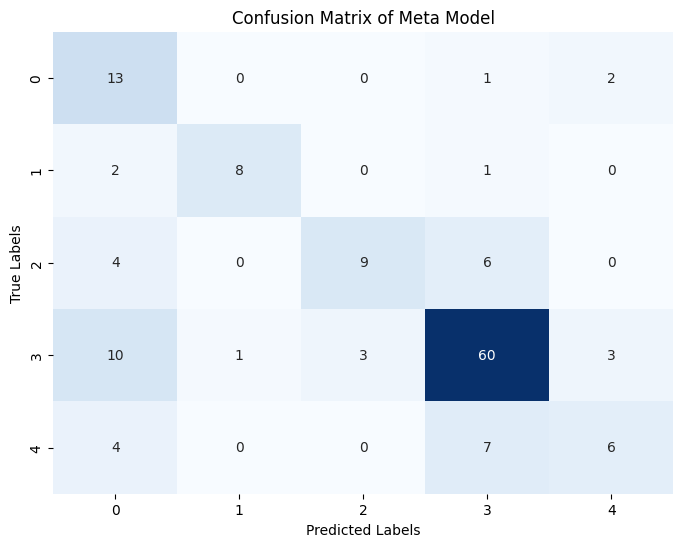

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Compute and plot confusion matrix

y_test_labels = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
meta_preds_labels = np.argmax(meta_preds, axis=1) if len(meta_preds.shape) > 1 else meta_preds
conf_matrix = confusion_matrix(y_test_labels, meta_preds_labels)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Meta Model")
plt.show()

Logistic regression as metaModel

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
y_train_labels = np.argmax(y_train, axis=1)
logreg_meta_model = LogisticRegression(max_iter=1000, solver='liblinear')
logreg_meta_model.fit(meta_features, y_train_labels)

LogisticRegression(max_iter=1000, solver='liblinear')

In [50]:
log_predicts= logreg_meta_model.predict(meta_test_features)

In [52]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_labels,log_predicts)
print(f"Accuracy of Meta Model: {accuracy * 100:.2f}%")

Accuracy of Meta Model: 66.43%


In [53]:
from sklearn.metrics import classification_report


print(classification_report(y_test_labels, log_predicts))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        16
           1       0.89      0.73      0.80        11
           2       0.41      0.37      0.39        19
           3       0.74      0.82      0.78        77
           4       0.50      0.29      0.37        17

    accuracy                           0.66       140
   macro avg       0.61      0.57      0.58       140
weighted avg       0.65      0.66      0.65       140



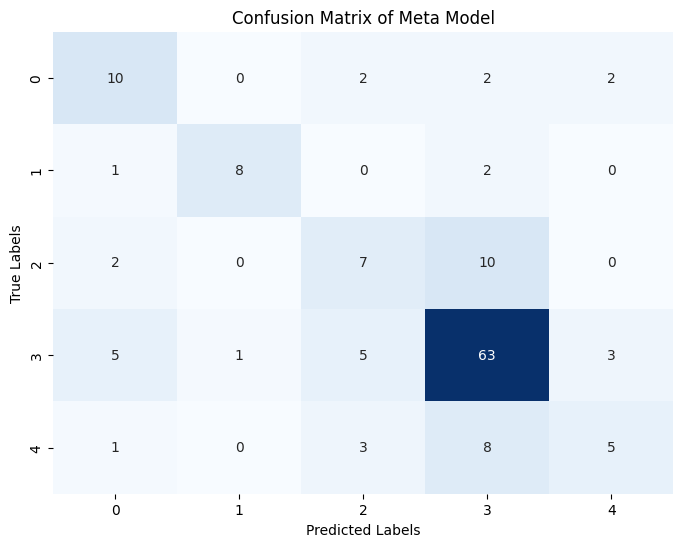

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Compute and plot confusion matrix

y_test_labels = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
log_predicts_labels = np.argmax(log_predicts, axis=1) if len(log_predicts.shape) > 1 else log_predicts
conf_matrix = confusion_matrix(y_test_labels, log_predicts_labels)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Meta Model")
plt.show()

SVM linear kernal s meta model

In [55]:
from sklearn.svm import SVC
svm_meta_model = SVC(kernel='linear')  # Linear kernel (you can change this to 'rbf' or others)
svm_meta_model.fit(meta_features, y_train_labels)

SVC(kernel='linear')

In [56]:
svm_predictions = svm_meta_model.predict(meta_test_features)
svm_accuracy = accuracy_score(y_test_labels, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.6571


In [57]:
from sklearn.metrics import classification_report


print(classification_report(y_test_labels, svm_predictions))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.89      0.73      0.80        11
           2       0.33      0.37      0.35        19
           3       0.74      0.82      0.78        77
           4       0.50      0.24      0.32        17

    accuracy                           0.66       140
   macro avg       0.61      0.55      0.57       140
weighted avg       0.65      0.66      0.65       140



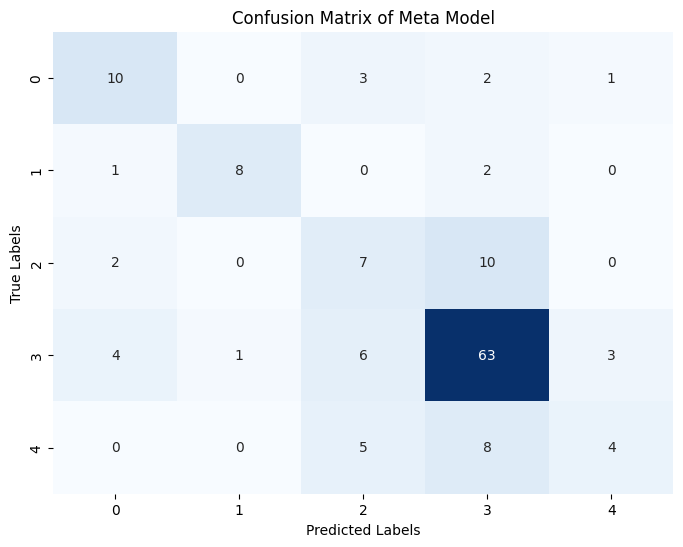

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Compute and plot confusion matrix

y_test_labels = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
svm_predictions_labels = np.argmax(svm_predictions, axis=1) if len(svm_predictions.shape) > 1 else svm_predictions
conf_matrix = confusion_matrix(y_test_labels,svm_predictions)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Meta Model")
plt.show()

Svm rbf kernal as meta model

In [60]:
svm_meta_model2 = SVC(kernel='rbf',gamma='auto')  # Linear kernel (you can change this to 'rbf' or others)
svm_meta_model2.fit(meta_features, y_train_labels)

SVC(gamma='auto')

In [62]:
svm_predictions2 = svm_meta_model2.predict(meta_test_features)
svm_accuracy2 = accuracy_score(y_test_labels, svm_predictions2)
print(f"SVM Accuracy: {svm_accuracy2:.4f}")

SVM Accuracy: 0.6857


In [63]:
from sklearn.metrics import classification_report


print(classification_report(y_test_labels, svm_predictions2))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.89      0.73      0.80        11
           2       0.50      0.42      0.46        19
           3       0.73      0.83      0.78        77
           4       0.56      0.29      0.38        17

    accuracy                           0.69       140
   macro avg       0.66      0.59      0.61       140
weighted avg       0.68      0.69      0.67       140



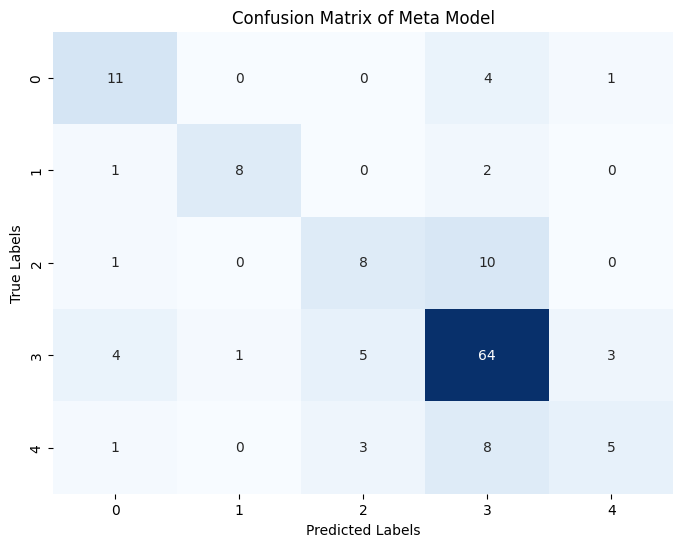

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Compute and plot confusion matrix

y_test_labels = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
svm_predictions_labels2 = np.argmax(svm_predictions2, axis=1) if len(svm_predictions2.shape) > 1 else svm_predictions2
conf_matrix = confusion_matrix(y_test_labels,svm_predictions2)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Meta Model")
plt.show()

Xgboost as meta model

In [67]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.2 MB/s eta 0:00:00


In [70]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have meta_features_train and y_train prepared from your base models' predictions

# Initialize XGBoost model
xgb_meta_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Train the XGBoost meta-model
xgb_meta_model.fit(meta_features, y_train)




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:50:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [71]:
meta_predictions = xgb_meta_model.predict(meta_test_features)

# Convert y_test to a 1D array if it's multilabel or one-hot encoded (for multiclass classification)
y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# Evaluate accuracy of the meta-model
accuracy = accuracy_score(y_test, meta_predictions)
print(f"Meta-Model Test Accuracy (XGBoost): {accuracy:.2f}")

Meta-Model Test Accuracy (XGBoost): 0.62


In [73]:
from sklearn.metrics import classification_report


print(classification_report(y_test, meta_predictions))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.89      0.73      0.80        11
           2       0.50      0.53      0.51        19
           3       0.78      0.78      0.78        77
           4       0.45      0.29      0.36        17

   micro avg       0.71      0.67      0.69       140
   macro avg       0.66      0.60      0.63       140
weighted avg       0.70      0.67      0.68       140
 samples avg       0.65      0.67      0.65       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


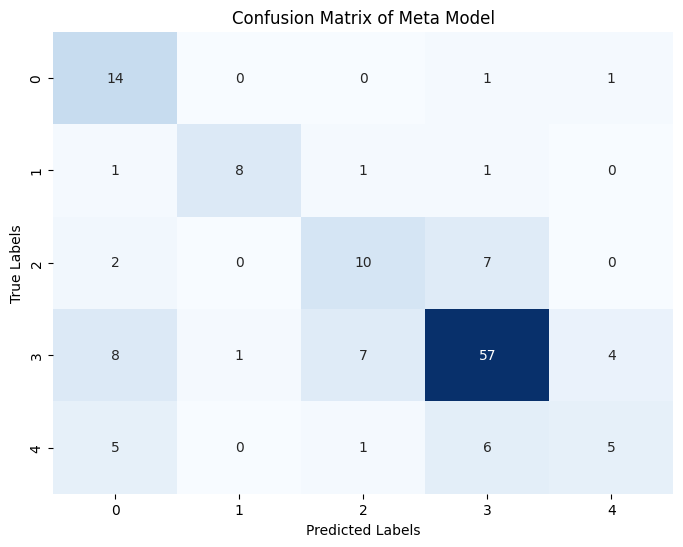

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Compute and plot confusion matrix

y_test_labels = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
meta_predictions = np.argmax(meta_predictions, axis=1) if len(meta_predictions.shape) > 1 else meta_predictions
conf_matrix = confusion_matrix(y_test_labels,meta_predictions)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Meta Model")
plt.show()

In [76]:
import pickle

# Save the meta model
filename = 'meta_xgb.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_meta_model, file)

print(f"Meta-model saved as {filename}")


Meta-model saved as meta_xgb.pkl


In [77]:
import pickle

# Save the meta model
filename = 'meta_svm_rbf.pkl'
with open(filename, 'wb') as file:
    pickle.dump(svm_meta_model2, file)

print(f"Meta-model saved as {filename}")


Meta-model saved as meta_svm_rbf.pkl


In [78]:
import pickle

# Save the meta model
filename = 'meta_svm.pkl'
with open(filename, 'wb') as file:
    pickle.dump(svm_meta_model, file)

print(f"Meta-model saved as {filename}")

Meta-model saved as meta_svm.pkl


In [79]:
import pickle

# Save the meta model
filename = 'meta_logreg.pkl'
with open(filename, 'wb') as file:
    pickle.dump(logreg_meta_model, file)

print(f"Meta-model saved as {filename}")

Meta-model saved as meta_logreg.pkl


In [80]:
import pickle

# Save the meta model
filename = 'meta_rndmforest.pkl'
with open(filename, 'wb') as file:
    pickle.dump(meta_classifier, file)

print(f"Meta-model saved as {filename}")

Meta-model saved as meta_rndmforest.pkl
